# Imports

In [1]:
import git
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd
import geopandas as gp
from geopy.distance import geodesic
import ipywidgets as widgets

https://geopandas.org/en/stable/getting_started.html

# Update

In [2]:
print(git.Repo().submodule_update(init=True).module().git.pull())
print(git.Repo().submodule_update(init=True).module().git.status())

Already up to date.
On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Airports.ipynb
	modified:   ourairports-data (new commits)

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.~Airports.ipynb
	ne_10m_admin_0_countries.geojson

no changes added to commit (use "git add" and/or "git commit -a")


# Load data

In [3]:
airports = pd.read_csv("ourairports-data/airports.csv", index_col="id")
runways = pd.read_csv("ourairports-data/runways.csv", index_col="id")
freqs = pd.read_csv("ourairports-data/airport-frequencies.csv", index_col="id")
countries = pd.read_csv("ourairports-data/countries.csv", index_col="id")
regions = pd.read_csv("ourairports-data/regions.csv", index_col="id")

# Search by distance

In [4]:
search = "EGCC"
airport = airports.loc[airports["ident"] == search]
x = 100.0
y1 = 20.0
y2 = 20.0

In [5]:
freqs[freqs["airport_ident"] == search]

,airport_ref,airport_ident,type,description,frequency_mhz
id,,,,,
58406,2398,EGCC,APP,APP,135.000
58407,2398,EGCC,ATIS,ATIS,128.175
58408,2398,EGCC,CLD,CLNC DEL,121.700
58409,2398,EGCC,GND,GND,121.850
58410,2398,EGCC,TWR,TWR,118.625
329164,2398,EGCC,TWR,NaN,119.400


In [6]:
runways[runways["airport_ident"] == search]

,airport_ref,airport_ident,length_ft,width_ft,surface,lighted,closed,le_ident,le_latitude_deg,le_longitude_deg,le_elevation_ft,le_heading_degT,le_displaced_threshold_ft,he_ident,he_latitude_deg,he_longitude_deg,he_elevation_ft,he_heading_degT,he_displaced_threshold_ft
id,,,,,,,,,,,,,,,,,,,
239540,2398,EGCC,10000.0,148.0,ASP,1,0,05L,53.345100,-2.29274,212.0,51.0,1401.0,23R,53.362400,-2.25714,249.0,231.0,600.0
239539,2398,EGCC,10007.0,148.0,CON,1,0,05R,53.332001,-2.31066,186.0,51.0,604.0,23L,53.349098,-2.27499,227.0,231.0,604.0


In [7]:
airports["Distance"] = airports.apply(
    lambda row: geodesic(
        (airport["latitude_deg"].values[0], airport["longitude_deg"].values[0]),
        (row["latitude_deg"], row["longitude_deg"]),
    ).nm,
    axis=1,
).round(1)

In [8]:
airports.sort_values("Distance").head(10)

,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,Distance
id,,,,,,,,,,,,,,,,,,
2398,EGCC,large_airport,Manchester Airport,53.349375,-2.279521,257.0,EU,GB,GB-ENG,Manchester,yes,EGCC,MAN,NaN,http://www.manchesterairport.co.uk/,https://en.wikipedia.org/wiki/Manchester_Airport,"Ringway Airport, RAF Ringway",0.0
319156,GB-0344,heliport,Wythenshawe Hospital Helipad,53.388414,-2.289633,NaN,EU,GB,GB-ENG,Manchester,no,NaN,NaN,NaN,NaN,NaN,NaN,2.4
521298,GB-1097,closed,RAF Cheadle,53.391312,-2.212458,NaN,EU,GB,GB-ENG,Cheadle,no,NaN,NaN,NaN,NaN,NaN,NaN,3.5
326746,GB-0547,small_airport,Pear Tree Farm Airstrip,53.279333,-2.297641,200.0,EU,GB,GB-ENG,Marthall,no,NaN,NaN,NaN,NaN,NaN,NaN,4.3
2399,EGCD,closed,Manchester Woodford Airport,53.338100,-2.148890,295.0,EU,GB,GB-ENG,Manchester,no,NaN,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Woodford_Aerodrome,"EGCD, EGCD, XXB",4.7
35149,GB-0003,closed,Alexandra Park Aerodrome,53.436401,-2.250200,NaN,EU,GB,GB-ENG,Manchester,no,NaN,NaN,NaN,NaN,NaN,NaN,5.3
318145,GB-0306,closed,Lymm Dam Airstrip,53.368838,-2.476410,NaN,EU,GB,GB-ENG,Lymm,no,NaN,NaN,NaN,NaN,NaN,NaN,7.2
29114,EGCB,small_airport,City Airport Manchester,53.471699,-2.389720,73.0,EU,GB,GB-ENG,Manchester / Salford,no,EGCB,NaN,NaN,http://www.cityairportmanchester.com/,https://en.wikipedia.org/wiki/City_Airport_Man...,Barton Aerodrome,8.3
333149,GB-0733,small_airport,Fern Farm Airstrip UL,53.207400,-2.252800,NaN,EU,GB,GB-ENG,Marton,no,NaN,NaN,NaN,NaN,NaN,NaN,8.6


In [9]:
airports.where(
    (airports["Distance"] >= x - y1) & (airports["Distance"] <= x + y2)
).dropna(how="all", axis=0).sort_values("Distance")

,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,Distance
id,,,,,,,,,,,,,,,,,,
334128,GB-0841,small_airport,Home Farm Airstrip,52.053300,-1.729000,NaN,EU,GB,GB-ENG,Ebrington (Glos),no,NaN,NaN,NaN,NaN,NaN,NaN,80.4
320285,GB-0388,small_airport,Pitsford Water,52.315300,-0.871944,330.0,EU,GB,GB-ENG,NaN,no,NaN,NaN,NaN,NaN,NaN,Moulton Grange Farm,80.5
337009,GB-0934,small_airport,Acthorpe Top Farm Airstrip,53.373703,-0.037165,NaN,EU,GB,GB-ENG,South Elkington,no,NaN,NaN,NaN,NaN,NaN,NaN,80.6
321057,GB-0462,small_airport,Octon Airstrip,54.126600,-0.430369,227.0,EU,GB,GB-ENG,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,80.8
320464,GB-0405,small_airport,Hardwicke Airstrip,52.085300,-3.061630,500.0,EU,GB,GB-ENG,Hardwicke,no,NaN,NaN,NaN,NaN,NaN,NaN,81.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333726,GB-0789,small_airport,Langham Airstrip,52.935500,0.954500,NaN,EU,GB,GB-ENG,"Holt, Norfolk",no,NaN,NaN,NaN,NaN,NaN,RAF Langham,119.5
332844,GB-0685,small_airport,Athey's Moor Airfield,55.316961,-1.785493,NaN,EU,GB,GB-ENG,Longframlington,no,NaN,NaN,NaN,NaN,NaN,NaN,119.5
316275,GB-0204,small_airport,Plaistows Airfield,51.728167,-0.380173,395.0,EU,GB,GB-ENG,"St Albans, Hertfordshire",no,NaN,NaN,NaN,NaN,NaN,Chiswell Green,119.7


# Airports by country

In [10]:
airports.groupby("iso_country").nunique()

,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,Distance
iso_country,,,,,,,,,,,,,,,,,
AD,3,2,3,3,3,1,1,2,2,1,0,0,0,0,1,0,3
AE,253,6,249,252,253,69,1,8,84,2,27,16,2,9,26,9,190
AF,82,4,80,81,81,66,1,29,64,2,45,33,1,2,37,33,78
AG,6,4,6,6,6,3,0,4,5,2,3,2,0,0,3,2,6
AI,2,2,2,2,2,1,0,1,2,2,1,1,0,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YE,43,4,43,43,43,31,1,16,32,2,23,22,3,0,19,11,42
YT,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,1
ZA,652,6,651,647,651,495,1,10,499,2,321,92,8,30,67,61,604


# Airports by elevation

<Axes: ylabel='Frequency'>

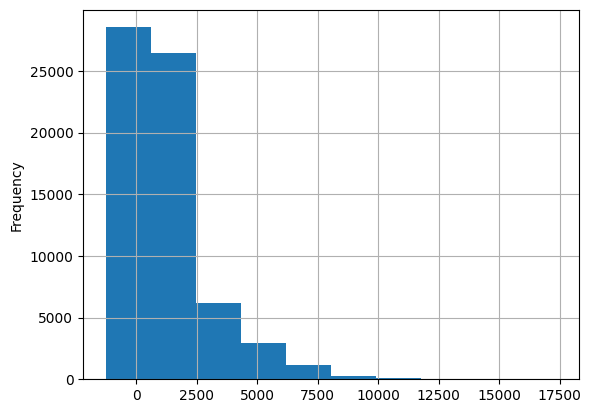

In [11]:
airports["elevation_ft"].plot.hist(grid=True)

# Airports by ISO region

In [12]:
airports.groupby("iso_region").nunique()

,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,Distance
iso_region,,,,,,,,,,,,,,,,,
AD-04,2,2,2,2,2,0,1,1,1,1,0,0,0,0,0,0,2
AD-08,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,1
AE-AJ,10,1,10,10,10,6,1,1,3,1,0,0,0,0,0,0,7
AE-AZ,150,6,147,150,150,41,1,1,53,2,18,7,1,4,16,6,129
AE-DU,22,5,21,22,22,10,1,1,8,2,3,5,0,4,4,2,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZW-MI,18,3,18,18,18,12,1,1,12,1,12,1,1,0,3,1,18
ZW-MN,34,4,34,34,34,28,1,1,21,2,14,3,0,0,3,3,33
ZW-MS,12,1,12,12,12,8,1,1,12,1,7,0,0,0,0,0,12


# Scheduled service

In [13]:
airports.groupby("scheduled_service").nunique()

,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,Distance
scheduled_service,,,,,,,,,,,,,,,,,
no,75960,7,71745,74887,75157,6199,6,227,2688,33391,38162,4807,31570,3004,11922,16890,37650
yes,4543,6,4532,4542,4540,1757,6,235,1702,4278,4393,4286,1236,1153,4381,1584,4380


# Maps

In [14]:
world = gp.read_file("ne_10m_admin_0_countries.geojson")

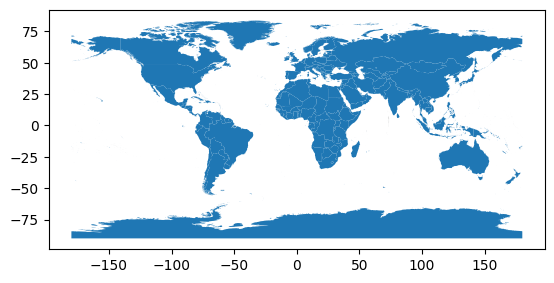

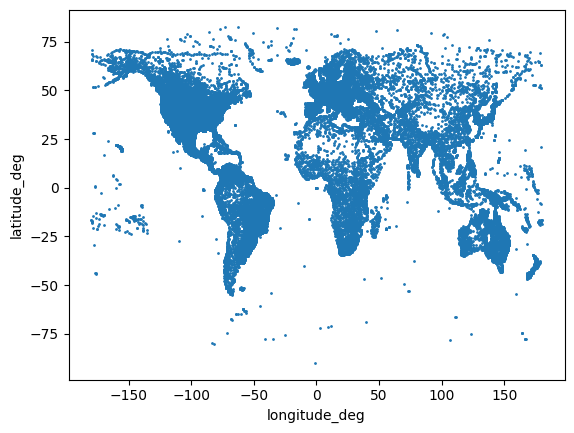

In [18]:
world.plot()
x = airports.plot.scatter(y="latitude_deg", x="longitude_deg", s=1)

In [16]:
temp = airports.groupby("iso_country")["ident"].nunique()

<Axes: >

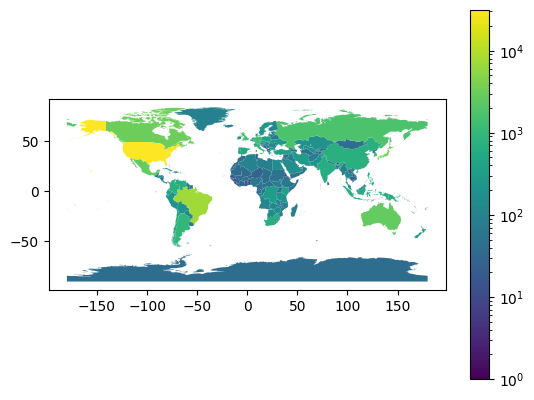

In [17]:
world.merge(temp, right_index=True, left_on="ISO_A2", how="left").plot(
    "ident", legend=True, norm=LogNorm()
)